In [146]:
import random
import math
from datetime import datetime
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
import copy
from statistics import mean
import matplotlib.pyplot as plt

In [147]:
Operators = ["+", '-', '*', '/',"^", "sin" , "cos"]
Values = list (range(1,11))
variable = ['x']
First_population = 50
Best_choise_num = 5
Other_choise_num = 2
Iteration = 100
Mutation_rate = 70 #From 100%
Mutation_count = 2 #Per gen
Max_tree_depth = 5


In [148]:
def function(x):
    # return 2 * (x**2) + 3 * x + 1
    return x**2

In [149]:
X_train = np.random.randint(1, 1000, size=(100, 1))
y_train = function(X_train[:,0])
len(X_train)
y_train


array([864900, 410881, 375769, 106276,  71824,  47524,  65536,   6084,
       638401, 633616, 636804, 748225, 656100, 311364, 799236, 844561,
       258064, 180625,  69696, 112225,  27225, 419904, 938961, 219024,
       998001,  22801,   8836, 958441, 695556, 288369, 727609,  63001,
        44100, 734449,  63001,  18496, 302500, 226576, 669124, 540225,
       108900,  97344,  72900, 233289, 851929, 877969,  96721, 327184,
       813604, 614656, 927369, 804609,  55225, 641601, 311364, 550564,
          324, 272484, 857476,  12100,   5476, 222784,  72361,   5041,
       998001, 599076, 474721,  15129, 222784, 636804,  17161, 379456,
       516961,     16, 133225, 648025, 225625,  90601,  25600,  84681,
        32761, 788544, 383161, 797449,  26244,   3721, 399424,  77841,
       524176, 161604, 788544,  30276, 492804, 379456, 173056, 724201,
       864900, 181476, 919681, 986049])

In [150]:
class Node() :
    def __init__(self , operator , children) :
        self.operator = operator
        self.children = children
        self.isLeaf= False
        self.value = 0


In [151]:
class Tree () :
    def __init__(self , max_depth = 6) :
        self.max_depth = max_depth
        self.root = None
    def createFromRoot (self , node):
        self.root = node

    def returnRoot (self):
        node = self.root
        return node

    def create (self):
        self.root  = self.grow()
    
    def printTree (self , node = None):
        if (node == None):
            print(self.to_math_string(self.root))
        else:
            print(self.to_math_string(node))
        

    def grow (self , depth = 0 ):

        temp_op = random.choice(Operators)
        temp_rand = random.randint(0 , 10)

        if (depth == self.max_depth or temp_rand > 7):
            if (temp_op == "sin" or temp_op == "cos"):
                temp_node = Node (operator=temp_op, children=["x"])
                temp_node.isLeaf = True
                return temp_node
            else :
                child = random.choice(Values)
                temp_node = Node (operator= temp_op , children=["x",child])
                temp_node.isLeaf = True
                return temp_node
        
        else:
            if (temp_op == "sin" or temp_op == "cos"):
                child = self.grow ( depth= depth + 1 )
                temp_node = Node (operator= temp_op , children=[child])
                return temp_node
            else :
                left_node  = self.grow ( depth= depth + 1 )
                right_node = self.grow ( depth= depth + 1 )
                temp_node = Node (operator= temp_op , children=[left_node,right_node])
                return temp_node
    
    def to_math_string(self , node):
        if isinstance ( node , Node):
            if node.isLeaf:
                if len(node.children) == 1:
                    return f"{node.operator}({node.children[0]})"
                else:
                    return f"({node.children[0]} {node.operator} {node.children[1]})"
            else:
                if len(node.children) == 1:
                    return f"{node.operator}({self.to_math_string(node.children[0])})"
                else:
                    return f"({self.to_math_string(node.children[0])} {node.operator} {self.to_math_string(node.children[1])})"
            
    
    def calculate (self , val):
        return self.calculator ( self.root , val)


    def calculator (self , node , val):
        if isinstance (node , Node):
            if node.isLeaf:
                if len(node.children) == 1:
                    node.value = self.SinCosOp (node , val)
                    # return node.value
                else :
                    node.value = self.OtherOp (node , val , node.children[1])
                    # return node.value
            else:
                if len(node.children) == 1:
                    temp_val = self.calculator(node.children[0] , val)
                    node.value = self.SinCosOp (node , temp_val)
                else :
                    temp_val1 = self.calculator(node.children[0], val)
                    temp_val2 = self.calculator(node.children[1], val)
                    node.value = self.OtherOp (node , temp_val1 , temp_val2)
            return node.value
            


    def SinCosOp (self , node , val):
        if (node.operator == "sin"):
            return np.sin(val)
        if (node.operator == "cos"):
            return np.cos(val)
        
    def OtherOp(self, node, val1, val2, flag=False):
        if flag:
            return

        if node.operator == "+":
            result = val1 + val2
            if result > 10000:
                flag = True
                return 10000
            elif result < -10000:
                flag = True
                return -10000
            else:
                return result
        elif node.operator == "-":
            result = val1 - val2
            if result > 10000:
                flag = True
                return 10000
            elif result < -10000:
                flag = True
                return -10000
            else:
                return result
        elif node.operator == "*":
            result = val1 * val2
            if result > 10000:
                flag = True
                return 10000
            elif result < -10000:
                flag = True
                return -10000
            else:
                return result
        elif node.operator == "/":
            if val2 == 0:
                flag = True
                return 1
            # Convert val1 and val2 to float to avoid overflow errors
            result = float(val1) / float(val2)
            if result > 10000:
                flag = True
                return 10000
            elif result < -10000:
                flag = True
                return -10000
            else:
                return result
        elif node.operator == "^":
            if val1 == 0 and val2 < 0:
                return 1
            else:
                if val2 == 0:
                    return 1
                x = 1
                i = 1
                while not flag and i <= val2:
                    x = x * val1
                    i += 1
                    if x > 10000 or x < -10000:
                        flag = True
                        return 10000
                return x



    def TreeToList (self):
        root = self.root
        nodes = []
        self.traverse(root , nodes)
        return nodes
    
    def traverse (self , node , nodes):
        nodes.append(node)
        if (node.isLeaf == False):
            for i in range (len(node.children)):
                self.traverse (node.children[i] , nodes)

    def ReplaceNode (self , selfNode , replaceNode):
        
        
        root = self.root
        self.root = self.traverseToFind (root , selfNode , replaceNode)
        # self.printTree(self.root)

    def traverseToFind (self ,node , selfNode , replaceNode):
        if (node == selfNode ):
                node = copy.deepcopy(replaceNode)
                return node
        else :
            if (node.isLeaf == False):
                for i in range (len(node.children)):
                    node.children[i]= self.traverseToFind(node.children[i] , selfNode , replaceNode)

            return node


In [152]:
def Create_tree ():
    my_tree = Tree(random.randint(1 , Max_tree_depth))
    my_tree.create()
    return my_tree


In [153]:
treeList = []
for i in range (First_population):
    treeList.append(Create_tree())
    treeList[i].printTree()
    # treeList[i].calculate(1)


mseTree = []
for tree in treeList :
    valueList = []
    for i in range(len(X_train)) :
        temp = tree.calculate(X_train[i][0])
        valueList.append(temp)
    # print(np.array(valueList))
    mse = mean_squared_error(y_train,valueList)
    mseTree.append (mse)
mseTree = np.array(mseTree)
print (mseTree)

(sin(((x + 2) / (x * 2))) * cos((x / 4)))
(x ^ 1)
(x + 1)
((x - 10) + (x * 1))
(sin((cos(((x / 1) ^ sin(x))) + (x ^ 3))) ^ (x / 8))
((x * 8) + cos(x))
cos(((sin(x) - (x ^ 3)) ^ ((x + 1) - cos(x))))
(((x + 8) ^ (x * 9)) / cos((x ^ 5)))
(x ^ 9)
(x * 6)
sin(x)
(sin(cos(x)) * (x - 6))
((sin(x) ^ ((x * 7) + (x + 4))) + ((sin(x) ^ cos(x)) - ((x - 7) - (x ^ 2))))
cos(x)
((cos(x) ^ (x + 9)) * (x * 7))
sin(((x ^ 1) / (x * 10)))
(((((x ^ 3) + sin(x)) - ((x - 3) * (x ^ 3))) - ((x / 6) / sin((x ^ 2)))) ^ (sin(x) - (((x + 6) * (x + 3)) + ((x ^ 5) + (x ^ 5)))))
((x / 10) - (((x ^ 1) - sin(x)) / sin(sin(x))))
((cos(((x / 2) * cos(x))) / (((x ^ 1) / (x ^ 5)) / (x - 3))) - (x + 1))
(x / 2)
(x / 4)
((x - 3) / ((sin(x) + (cos((x / 10)) - ((x / 4) + (x * 9)))) * (x - 8)))
sin((x / 10))
sin(x)
((x * 4) + (sin(sin((x ^ 2))) * ((x + 1) - ((x ^ 9) * sin(x)))))
cos((x + 4))
(((x * 2) * ((x * 4) + (x - 6))) - sin(x))
((sin(x) * cos(x)) / (cos(x) * (x * 2)))
(cos(((x ^ 5) ^ cos(x))) - cos(cos((sin(cos(x)) / (sin

In [154]:
avg = []
for i in range (Iteration):

    bestTrees = []
    otherTrees = []

    #Find the best MSEs
    bestTreesIndex = mseTree.argsort()[:Best_choise_num]
    other_idx = np.arange(len(mseTree))[~np.isin(np.arange(len(mseTree)), bestTreesIndex)]
    
    #Create new gen from best trees and others
    for j in range (len(bestTreesIndex)):
        bestTrees.append(treeList[bestTreesIndex[j]])
    for j in range (len(other_idx)):
        otherTrees.append(treeList[other_idx[j]])
    random_elements = random.sample(otherTrees, Other_choise_num)
    for element in random_elements :
         bestTrees.append(element)

    # Mutation
    tempRate = random.randint(0,100)
    if (tempRate <= Mutation_rate):
        for j in range (Mutation_count):
            tempTree = Create_tree()
            bestTrees.append(tempTree)
            # tempTree.printTree()


    treeList =[]
    for j in range (len(bestTrees)):
        treeList.append(bestTrees[j])
        for k in range (j+1 , len(bestTrees)):

            temp1 = copy.deepcopy(bestTrees[j])
            temp2 = copy.deepcopy(bestTrees[k])

            nodes1= temp1.TreeToList()
            nodes2 = temp2.TreeToList()

            select1 = random.choice (nodes1)
            select2 = random.choice (nodes2)

            # print ("Before change")
            # temp1.printTree()
            # temp2.printTree()

            # print ("Selected Nodes:")
            # temp1.printTree(select1)
            # temp2.printTree(select2)

            temp1.ReplaceNode (select1 , select2)
            temp2.ReplaceNode (select2 , select1)

            # print ("After change")
            # temp1.printTree()
            # temp2.printTree()

            treeList.append(temp1)
            treeList.append(temp2)
            
            # print ("Child created!")
            # print ("-----------------------------------------------------------")


    mseTree=[]
    # print ("All childs created!")
    for tree in treeList :
        # tree.printTree()
        valueList = []
        for j in range(len(X_train)) :
            temp = tree.calculate(X_train[j][0])
            valueList.append(temp)
        valueList = np.array(valueList)
        mse = mean_squared_error(y_train,valueList)
        mseTree.append (abs(mse))
    sorted_list = sorted(mseTree)
    lowest_five = sorted_list[:Best_choise_num]
    # avg.append(mean (lowest_five))
    avg.append(sum(lowest_five) / len(lowest_five))
    mseTree = np.array(mseTree)
    # print (mseTree)

sorted_list = sorted(mseTree)
lowest_five = sorted_list[:Best_choise_num]
bestTreesIndex = mseTree.argsort()[:Best_choise_num]
for j in range (len(bestTreesIndex)):
        treeList[bestTreesIndex[j]].printTree()

# print ("------------------------------------------")
# print (mseTree)

# np.array(avg)
avg


sin((sin((x ^ 9)) + ((x / 9) + (x / 2))))
((x + 6) + (x / 9))
(x ^ 7)
cos((cos(x) * (x ^ 1)))
(((x + 5) ^ sin((((x + 2) / sin(x)) / (x - 10)))) + (cos(sin(x)) - sin(((x + 2) + ((x ^ 5) * (x * 8))))))
(x / 3)
sin(cos(((x / 8) + ((x - 4) ^ (x - 8)))))
(cos(sin(x)) ^ ((x / 10) / (x ^ 4)))
cos((cos(x) ^ (sin((x ^ 6)) / (cos(x) ^ sin(x)))))
((sin((x ^ 10)) + ((x * 10) - cos(x))) / cos(x))
sin((sin((x * 1)) ^ cos(x)))
cos(cos(x))
(x ^ 10)
sin((sin(((x ^ 6) / cos(x))) / (((x * 2) - (x ^ 5)) ^ cos(x))))
sin((x / 5))
((x / 5) * (((x + 3) * (x / 5)) / (x / 5)))
((x / 8) ^ (x + 4))
(x / 3)
((x / 2) + (x + 5))
sin(sin(x))
(cos(x) ^ cos(x))
(x * 1)
(x ^ 2)
((x / 3) * sin(x))
(x / 10)
cos(x)
cos(x)
sin(((x ^ 9) * sin(x)))
(sin(x) * (x + 1))
(cos(x) / cos(x))
(x ^ 6)
(sin((x / 6)) - ((x + 9) / (x - 9)))
cos(((x - 5) / ((x ^ 1) * (x + 6))))
(x + 9)
(x / 6)
((x - 2) * sin(cos(cos((x ^ 7)))))
cos((((x ^ 2) + cos(x)) / ((x - 9) - (x ^ 2))))
((((((x - 7) ^ cos(x)) / (x + 10)) + ((sin(x) ^ sin(x)) * cos(si

[721404.7139999999,
 126725.88999999998,
 126725.88999999998,
 119371.2,
 89952.44,
 84508.41,
 68176.31999999999,
 62732.29,
 62732.29,
 62732.29,
 62732.29,
 62732.29,
 62732.29,
 62732.29,
 62732.29,
 62732.29,
 62732.29,
 62732.29,
 62732.29,
 62732.29,
 62732.29,
 62732.29,
 62732.29,
 62732.29,
 62732.29,
 62732.29,
 62732.29,
 62732.29,
 62732.29,
 62732.29,
 62732.29,
 62732.29,
 56572.29,
 38092.29,
 31932.29,
 31932.29,
 31932.29,
 31932.29,
 31932.29,
 31932.29,
 31932.29,
 31932.29,
 31932.29,
 31932.29,
 31932.29,
 31932.29,
 31932.29,
 31502.476000000002,
 29783.22,
 29783.22,
 29783.22,
 29782.922,
 29781.73,
 29781.73,
 29781.73,
 29781.73,
 29781.73,
 29781.73,
 29722.352000000003,
 29484.840000000004,
 29484.840000000004,
 29484.840000000004,
 29484.840000000004,
 29484.840000000004,
 29484.840000000004,
 29484.840000000004,
 29484.840000000004,
 29484.840000000004,
 29484.840000000004,
 29484.840000000004,
 29484.840000000004,
 29484.840000000004,
 29484.840000000004

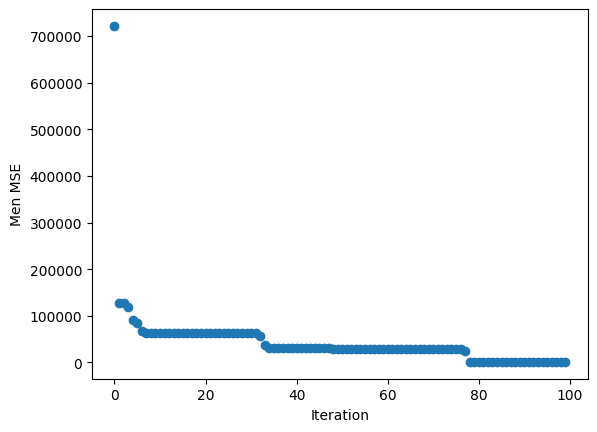

In [155]:
plt.scatter(range(len(avg)), avg)
plt.xlabel('Iteration')
plt.ylabel('Men MSE')

plt.show()